# LIBRERIAS

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
import io
import base64

In [ ]:
cds

# CARGUE DE DATOS

In [2]:
diccionario_seleccion = {
    "columnas": ['LOCALIDAD_COLEGIO', 'ESTRATO', 'PG_ICFES', 'DISTANCIA']
}

In [3]:
carpeta='C:/Users/Intevo/Desktop/UNIVERSIDAD D/1. Datos_ING_Industrial/PYTHON_LEO X cada semestre/SEMESTRE 1/'
df = pd.read_csv(carpeta+'R1_leo_2011-ADELANTE.csv',sep=';')
# Elimina la columna 'NUMERO'
df = df.drop(['NUMERO'], axis=1)

# Obtén las columnas seleccionadas del diccionario
columnas_seleccionadas = diccionario_seleccion.get('columnas', [])

# Si hay columnas seleccionadas, mantenlas en el DataFrame
if columnas_seleccionadas:
    X = df[columnas_seleccionadas]
else:
    X = df  # Usa todas las columnas si no hay selecciones

#X = df.drop(['RENDIMIENTO_UNO'], axis=1)            
Y = df[['RENDIMIENTO_UNO']]   
print(X.shape, Y.shape)


(2008, 4) (2008, 1)


In [4]:
from sklearn.preprocessing import LabelEncoder
X = X.astype('float32')                         #convertir todo el conjunto de datos de entrada en valores numéricos.
Y = LabelEncoder().fit_transform(Y.astype('str'))                #salida sea una etiqueta de número entero
print(X.shape, Y.shape)

(2008, 4) (2008,)


# COPIA DE DATOS PARA TRANSFORMACIÓN

In [5]:
X_R = X.copy(deep=True)  #Copia del Conjunto de datos para Reescalar 
X_E = X.copy(deep=True)  #Copia del Conjunto de datos para Estandarizar 
X_N = X.copy(deep=True)   #Copia del Conjunto de datos para Normalizar 
X_ROB = X.copy(deep=True)   #Copia del Conjunto de datos para la estandarización Robusta 
X_T_BOX = X.copy(deep=True)  #Copia del Conjunto de datos para Transformacion Box -Cox 
X_T_JOHNSON = X.copy(deep=True) #Copia del Conjunto de datos para Transformacion DE Johnson


# TRANSFORMACIONES

###  SIN TRANSFORMACIÓN

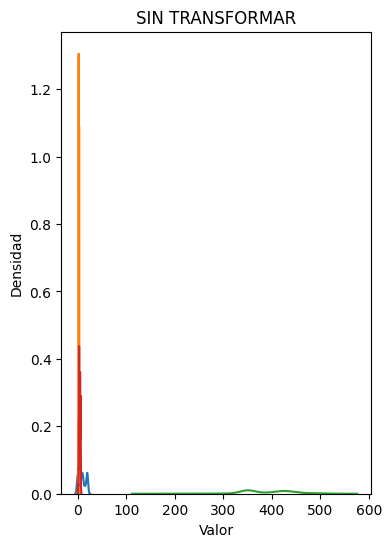

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes
fig1_1S, ax = plt.subplots(figsize=(4, 6))

# Iterar sobre las columnas de X y trazar KDE
for columna in X.columns:
    sns.kdeplot(X[columna], ax=ax, label=columna)

# Establecer título y leyenda
ax.set_title('SIN TRANSFORMAR')
#ax.legend()

# Etiquetar los ejes correctamente
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')

# Mostrar la gráfica
plt.show()

### REESCALAR

In [7]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

# Reescalar datos (entre 0 y 1)
Transformacion= MinMaxScaler(feature_range=(0, 1)).fit(X_R)

# transform, es quien transforma los datos y los deja como matriz del tipo NumPy
Reescalar_X_R = Transformacion.transform(X_R) 

# Decimales para cada uno de los valores 
set_printoptions(precision=3)

# Resumen de la transformación como matriz del tipo NumPy
print(Reescalar_X_R[0:5,:]) 

#Cambio de datos REESCALADOS de Numpy a pandas 
Xpandas_R = pd.DataFrame(data=Reescalar_X_R, columns=X.columns) 
Xpandas_R.head(2)

[[0.952 0.6   0.825 0.833]
 [0.095 0.6   0.947 0.667]
 [0.952 0.6   0.847 0.833]
 [0.905 0.4   0.962 0.667]
 [0.381 0.6   0.835 0.333]]


,LOCALIDAD_COLEGIO,ESTRATO,PG_ICFES,DISTANCIA
0,0.952381,0.6,0.8250,0.833333
1,0.095238,0.6,0.9475,0.666667


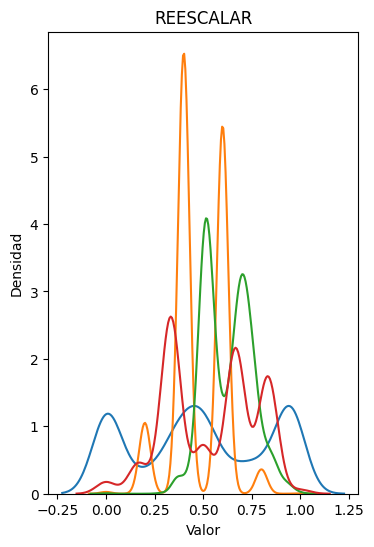

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes
fig2_1S, ax = plt.subplots(figsize=(4, 6))

# Iterar sobre las columnas de X y trazar KDE
for columna in Xpandas_R .columns:
    sns.kdeplot(Xpandas_R [columna], ax=ax, label=columna)

# Establecer título y leyenda
ax.set_title('REESCALAR')
#ax.legend()

# Etiquetar los ejes correctamente
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')

# Mostrar la gráfica
plt.show()

### ENTANDARIZACIÓN

In [9]:
from sklearn.preprocessing import StandardScaler 
from numpy import set_printoptions 

# Estandarizar datos (media 0, Desviación estandar 1) 
Transformacion = StandardScaler().fit(X_E) 

# transform, es quien transforma los datos y los deja como matriz del tipo NumPy
Reescalar_X_E = Transformacion.transform(X_E) 

# Decimales de los datos
set_printoptions(precision=3) 

#Resumen de la transformación y mostrar matriz del tipo NumPy
print(Reescalar_X_E[0:5,:]) 

#Cambio de datos ESTANDARIZADOS de Numpy a pandas
Xpandas_E = pd.DataFrame(data=Reescalar_X_E, columns=X.columns)
Xpandas_E.head(2)

[[ 1.352  0.915  1.636  1.281]
 [-1.142  0.915  2.639  0.56 ]
 [ 1.352  0.915  1.82   1.281]
 [ 1.214 -0.559  2.762  0.56 ]
 [-0.31   0.915  1.718 -0.881]]


,LOCALIDAD_COLEGIO,ESTRATO,PG_ICFES,DISTANCIA
0,1.352224,0.915186,1.636040,1.280588
1,-1.141769,0.915186,2.639188,0.559898


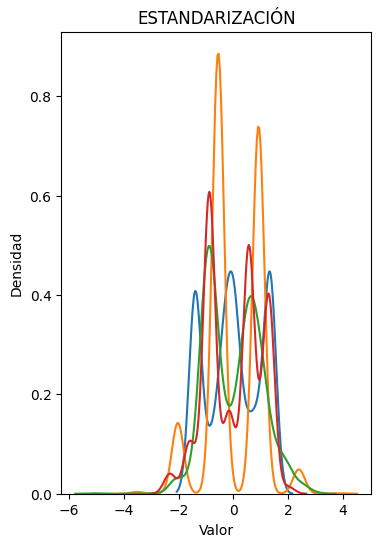

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes
fig3_1S, ax = plt.subplots(figsize=(4, 6))

# Iterar sobre las columnas de X y trazar KDE
for columna in Xpandas_E.columns:
    sns.kdeplot(Xpandas_E[columna], ax=ax, label=columna)

# Establecer título y leyenda
ax.set_title('ESTANDARIZACIÓN')
#ax.legend()

# Etiquetar los ejes correctamente
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')

# Mostrar la gráfica
plt.show()

### NORMALIZACIÓN

In [11]:
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions

# Normalizar datos (Trabajo sobre filas para conseguir longitud 1)
Transformacion= Normalizer().fit(X_N)

# fit.transform, es quien transforma los datos y los deja como matriz del tipo NumPy
Reescalar_X_N = Transformacion.transform(X_N)  

# Decimales 
set_printoptions(precision=3)

# Resumen de la transformación y mostrar matriz del tipo NumPy
print(Reescalar_X_N[0:5,:]) 

#Cambio de datos NORMALIZADOS de Numpy a pandas 
Xpandas_N = pd.DataFrame(data=Reescalar_X_N, columns=X.columns) 
Xpandas_N.head(3)

[[0.042 0.006 0.999 0.013]
 [0.004 0.006 1.    0.01 ]
 [0.041 0.006 0.999 0.012]
 [0.036 0.004 0.999 0.009]
 [0.017 0.006 1.    0.006]]


,LOCALIDAD_COLEGIO,ESTRATO,PG_ICFES,DISTANCIA
0,0.042152,0.006323,0.999011,0.012646
1,0.003824,0.005736,0.999931,0.009560
2,0.041368,0.006205,0.999048,0.012411


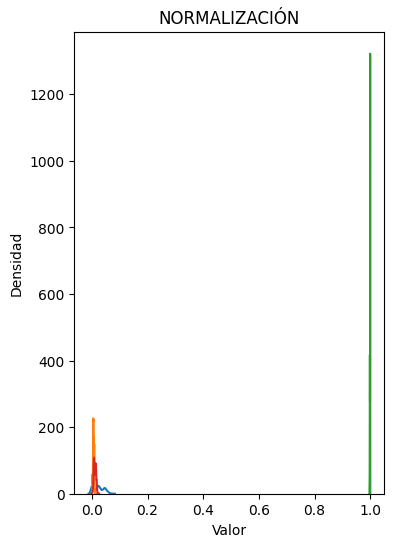

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes
fig4_1S, ax = plt.subplots(figsize=(4, 6))

# Iterar sobre las columnas de X y trazar KDE
for columna in Xpandas_N.columns:
    sns.kdeplot(Xpandas_N[columna], ax=ax, label=columna)

# Establecer título y leyenda
ax.set_title('NORMALIZACIÓN')
#ax.legend()

# Etiquetar los ejes correctamente
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')

# Mostrar la gráfica
plt.show()

### ESTANDARIZACIÓN ROBUSTA

In [13]:
# Estandarización ROBUSTA (media 0, mediana 0, desv. standard 1)
from numpy import set_printoptions
from sklearn.preprocessing import RobustScaler

# fit, es quien busca min y max de cada columna (cuartiles)
Transformacion= RobustScaler(quantile_range=(25, 75)).fit(X_ROB)

# transform, es quien aplica la transformación y los deja como matriz del tipo NumPy
Reescalar_X_ROB = Transformacion.transform(X_ROB) 

# Decimales y resumen de la transformación
set_printoptions(precision=3)
print(Reescalar_X_ROB[0:5,:])

#Cambio de datos de Estandarización ROBUSTA de Numpy a pandas
Xpandas_ROB = pd.DataFrame(data=Reescalar_X_ROB, columns=X.columns)
Xpandas_ROB.head(2)

[[ 0.714  1.     0.987  0.75 ]
 [-0.571  1.     1.608  0.25 ]
 [ 0.714  1.     1.101  0.75 ]
 [ 0.643  0.     1.684  0.25 ]
 [-0.143  1.     1.038 -0.75 ]]


,LOCALIDAD_COLEGIO,ESTRATO,PG_ICFES,DISTANCIA
0,0.714286,1.0,0.987342,0.75
1,-0.571429,1.0,1.607595,0.25


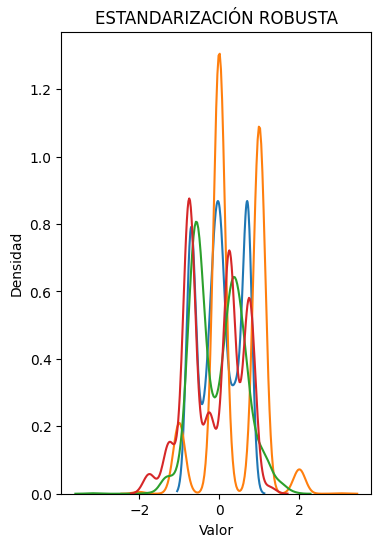

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes
fig5_1S, ax = plt.subplots(figsize=(4, 6))

# Iterar sobre las columnas de X y trazar KDE
for columna in Xpandas_ROB.columns:
    sns.kdeplot(Xpandas_ROB[columna], ax=ax, label=columna)

# Establecer título y leyenda
ax.set_title('ESTANDARIZACIÓN ROBUSTA')
#ax.legend()

# Etiquetar los ejes correctamente
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')

# Mostrar la gráfica
plt.show()

### BOX-COX

In [15]:
# OJO Reescalar datos (entre 1 y 2) ya que BOX - cox No funciona von valores de cero o negativos


from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
Transformacion= MinMaxScaler(feature_range=(1,2)).fit(X_R)

# transform, es quien transforma los datos y los deja como matriz del tipo NumPy
Reescalar_X_R = Transformacion.transform(X_R) 
print(Reescalar_X_R)

# Decimales para cada uno de los valores 
set_printoptions(precision=3)

# Resumen de la transformación como matriz del tipo NumPy
print(Reescalar_X_R[0:5,:]) 

#Cambio de datos REESCALADOS de Numpy a pandas 
Xpandas_R = pd.DataFrame(data=Reescalar_X_R, columns=X.columns) 
Xpandas_R.head(2)

# Tranformación Box -Cox (media 0, desv. standard 1, distri, Gaussiana)
from pandas.plotting import scatter_matrix
from numpy import set_printoptions
from sklearn.preprocessing import PowerTransformer

# fit, es quien busca la forma de la transformación
Transformacion_BOX= PowerTransformer(method='box-cox', standardize=True).fit(Xpandas_R)

# transform, es quien aplica la transformación y los deja como matriz del tipo NumPy
Reescalar_X_T_BOX = Transformacion_BOX.transform(Xpandas_R) 

# Decimales y resumen de la transformación
set_printoptions(precision=3)
print(Reescalar_X_T_BOX[0:5,:])

#Cambio de datos de Estandarización ROBUSTA de Numpy a pandas
Xpandas_T_BOX = pd.DataFrame(data=Reescalar_X_T_BOX, columns=X.columns)
Xpandas_T_BOX.head(2)


[[1.952 1.6   1.825 1.833]
 [1.095 1.6   1.947 1.667]
 [1.952 1.6   1.847 1.833]
 ...
 [1.    1.4   1.51  1.667]
 [1.    1.6   1.49  1.667]
 [1.    1.4   1.517 1.667]]
[[1.952 1.6   1.825 1.833]
 [1.095 1.6   1.947 1.667]
 [1.952 1.6   1.847 1.833]
 [1.905 1.4   1.962 1.667]
 [1.381 1.6   1.835 1.333]]
[[ 1.331  0.914  1.591  1.307]
 [-1.147  0.914  2.482  0.542]
 [ 1.331  0.914  1.759  1.307]
 [ 1.2   -0.574  2.588  0.542]
 [-0.287  0.914  1.666 -0.894]]


,LOCALIDAD_COLEGIO,ESTRATO,PG_ICFES,DISTANCIA
0,1.330866,0.914415,1.591467,1.306573
1,-1.146823,0.914415,2.482195,0.542054


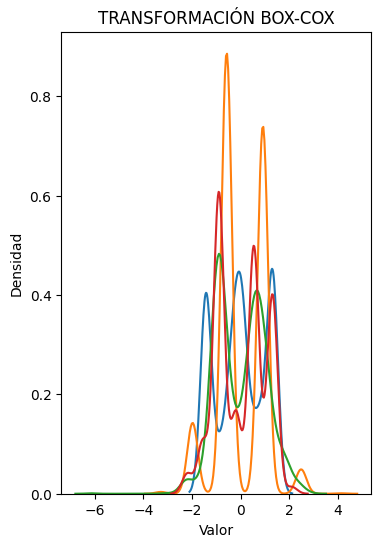

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes
fig6_1S, ax = plt.subplots(figsize=(4, 6))

# Iterar sobre las columnas de X y trazar KDE
for columna in Xpandas_T_BOX.columns:
    sns.kdeplot(Xpandas_T_BOX[columna], ax=ax, label=columna)

# Establecer título y leyenda
ax.set_title('TRANSFORMACIÓN BOX-COX')
#ax.legend()

# Etiquetar los ejes correctamente
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')

# Mostrar la gráfica
plt.show()

### YEO-JOHNSON

In [17]:
# Tranformación JOHNSON (datos positivos y negativos, Gaussiana)
from numpy import set_printoptions
from sklearn.preprocessing import PowerTransformer

# fit, es quien busca la forma de la transformación
Transformacion_JOHNSON= PowerTransformer(method='yeo-johnson',standardize=True).fit(X_T_JOHNSON)

# transform, es quien aplica la transformación y los deja como matriz del tipo NumPy
Reescalar_X_T_JOHNSON = Transformacion_JOHNSON.transform(X_T_JOHNSON) 

# Decimales y resumen de la transformación
set_printoptions(precision=3)
print(Reescalar_X_T_JOHNSON[0:5,:])

#Cambio de datos de transformación JOHNSON de Numpy a pandas
Xpandas_T_JOHNSON = pd.DataFrame(data=Reescalar_X_T_JOHNSON, columns=X.columns)
Xpandas_T_JOHNSON.head(2)



[[ 1.226  0.916  1.594  1.295]
 [-1.109  0.916  2.496  0.551]
 [ 1.226  0.916  1.763  1.295]
 [ 1.124 -0.574  2.604  0.551]
 [-0.156  0.916  1.669 -0.89 ]]


,LOCALIDAD_COLEGIO,ESTRATO,PG_ICFES,DISTANCIA
0,1.226283,0.915738,1.594217,1.295282
1,-1.109126,0.915738,2.495950,0.550841


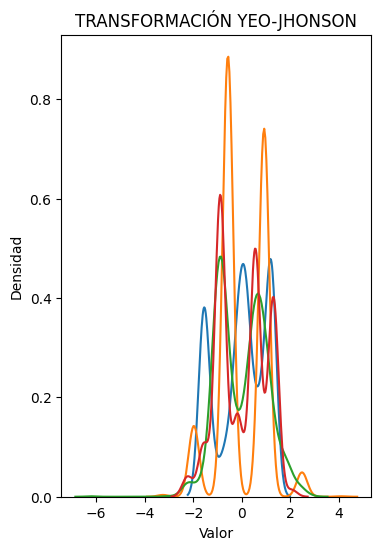

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes
fig7_1S, ax = plt.subplots(figsize=(4, 6))

# Iterar sobre las columnas de X y trazar KDE
for columna in Xpandas_T_JOHNSON.columns:
    sns.kdeplot(Xpandas_T_JOHNSON[columna], ax=ax, label=columna)

# Establecer título y leyenda
ax.set_title('TRANSFORMACIÓN YEO-JHONSON')
#ax.legend()

# Etiquetar los ejes correctamente
ax.set_xlabel('Valor')
ax.set_ylabel('Densidad')

# Mostrar la gráfica
plt.show()

# GRÁFICAS BASE 64

In [19]:
import io
import base64
import matplotlib.pyplot as plt

figuras = {
    "fig1_1S": fig1_1S,
    "fig2_1S": fig2_1S,
    "fig3_1S": fig3_1S,
    "fig4_1S": fig4_1S,
    "fig5_1S": fig5_1S,
    "fig6_1S": fig6_1S,
    "fig7_1S": fig7_1S
}


for nombre_figura, figura in figuras.items():
    buf = io.BytesIO()
    figura.savefig(buf, format='png')
    buf.seek(0)

    imagen_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')

    with open(f"{nombre_figura}.png", "w") as archivo:
        archivo.write(imagen_base64)

    print(f"La imagen {nombre_figura} se ha guardado en '{nombre_figura}.png'")


La imagen base64 de fig1_1S se ha guardado en 'fig1_1S.png'
La imagen base64 de fig2_1S se ha guardado en 'fig2_1S.png'
La imagen base64 de fig3_1S se ha guardado en 'fig3_1S.png'
La imagen base64 de fig4_1S se ha guardado en 'fig4_1S.png'
La imagen base64 de fig5_1S se ha guardado en 'fig5_1S.png'
La imagen base64 de fig6_1S se ha guardado en 'fig6_1S.png'
La imagen base64 de fig7_1S se ha guardado en 'fig7_1S.png'


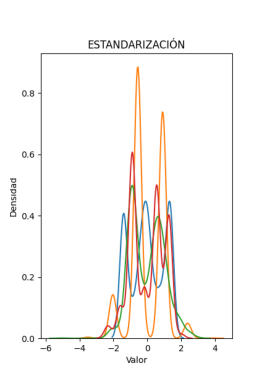

In [27]:
import base64
import matplotlib.pyplot as plt
import numpy as np

with open("fig3_1S.png", "r") as archivo:
    imagen_base64 = archivo.read()

imagen_decodificada = base64.b64decode(imagen_base64)

imagen_np = np.frombuffer(imagen_decodificada, dtype=np.uint8)

imagen = plt.imread(io.BytesIO(imagen_np))
plt.imshow(imagen)
plt.axis('off')
plt.show()


In [21]:

buf = io.BytesIO()
fig5_1S.savefig(buf, format='png')
buf.seek(0)

imagen_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')

print(imagen_base64)

with open("imagen_base64.png", "w") as archivo:
    archivo.write(imagen_base64)

print("La imagen se ha guardado en 'imagen_base64.png'")

iVBORw0KGgoAAAANSUhEUgAAAZAAAAJYCAYAAABM7LCIAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAACoDklEQVR4nOydd5wcdf3/X1O279VcSbvkUkhoIYFAQpESCCJSRORnKApEwEY0GPErWAiiElsoKgpSjEjooKEXg6EoAiaEJoH0fr1un/L5/fGZmZ3ts3t7uTvyfvK4xx27szOfu9zNa1/v9hEYYwwEQRAEUSTiUC+AIAiCGJmQgBAEQRAlQQJCEARBlAQJCEEQBFESJCAEQRBESZCAEARBECVBAkIQBEGUBAkIQRAEURIkIARBEERJkIAQBEEQJUECQhAEQZQECQhBEARREiQgBEEQREmQgBAEQRAlQQJCEARBlAQJCEEQBFESJCAEQRBESZCAEARBECVBAkIQBEGUBAkIQRAEURIkIARBEERJkIAQBEEQJUECQhAEQZQECQhBEARREiQgBEEQREmQgBAEQRAlQQJCEARBlAQJCEEQBFESJCAEQRBESZCAEARBECVBAkIQBEGUBAkIQRAEURIkIARBEERJkIAQBEEQJUECQhAEQZQECQhBEARREiQgBEEQREmQgBAEQRAlQQJCEARBlAQJCEEQBFESJCAEQRBESZCAEARBECVBAkIQBEGUBAkIQRAEURIkIARBEERJkIAQBEEQJUECQhBDxMsvvwy3241///vfQ70UgigJgTHGhnoRBLG/EY/Hcdhhh2HhwoW45pprhno5BFESJCAEMQS89957eOGFF7BkyRIIgjDUyyGIkiABIQiCIEqCciCDwIoVKyAIQs6P//znP9axoVAIS5cuxaGHHopAIIBRo0Zh1qxZWLx4Mfbs2YNt27blPZf9Y9u2bdZ5/+///g+CIGDBggVZ12g/72OPPZbx/PXXXw9B